# 1.Data Understanding & Cleaning (ETL – Extract & Transform)

In [24]:
!pip install matplotlib seaborn


In [25]:
pip install matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns

# load data

In [ ]:
#1. Extract
df = pd.read_csv('Sales Insights Dashboard_project.csv')
df.head()

,Transaction ID,Product,Region,Sales Rep,Units Sold,Unit Price,Date,Total Sale
0,TXN0001,Printer,South,Diana,14,1370.84,2024-01-01,19191.76
1,TXN0002,Monitor,North,Alice,5,1242.68,2024-01-02,6213.40
2,TXN0003,Keyboard,North,Diana,15,1427.21,2024-01-03,21408.15
3,TXN0004,Printer,South,Alice,17,1102.29,2024-01-04,18738.93
4,TXN0005,Tablet,West,Faith,14,939.45,2024-01-05,13152.30


# 2.understanding data

In [28]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Transaction ID  201 non-null    object 
 1   Product         201 non-null    object 
 2   Region          200 non-null    object 
 3   Sales Rep       201 non-null    object 
 4   Units Sold      201 non-null    int64  
 5   Unit Price      200 non-null    float64
 6   Date            201 non-null    object 
 7   Total Sale      201 non-null    float64
dtypes: float64(2), int64(1), object(5)
memory usage: 12.7+ KB


,Units Sold,Unit Price,Total Sale
count,201.000000,200.000000,201.000000
mean,10.114428,735.492400,7456.540597
std,5.485603,419.766594,6423.057332
min,1.000000,71.090000,79.100000
25%,5.000000,355.840000,2610.080000
50%,10.000000,716.940000,4906.720000
75%,15.000000,1074.280000,11449.500000
max,19.000000,1499.590000,25417.040000


# Clean the Data

In [29]:
#Handle missing values:
df.isnull().sum()
df['Unit Price'].fillna(df['Unit Price'].mean(), inplace=True)
df['Region'].fillna('Unknown', inplace=True)

C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_8948\4190766333.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Unit Price'].fillna(df['Unit Price'].mean(), inplace=True)
C:\Users\CAPACITI-JHB\AppData\Local\Temp\ipykernel_8948\4190766333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [30]:
#  Remove duplicates
df.drop_duplicates(inplace=True)

In [31]:
#  Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [32]:
#Ensure numeric fields are floats/integers
df['Unit Price'] = df['Unit Price'].astype(float)
df['Total Sale'] = df['Total Sale'].astype(int)

#  PART 2: Data Transformation & Aggregation

In [33]:

print(df.columns)

Index(['Transaction ID', 'Product', 'Region', 'Sales Rep', 'Units Sold',
       'Unit Price', 'Date', 'Total Sale'],
      dtype='object')


In [34]:
# Create Total Revenue Column
df['Total Revenue'] = df['Unit Price'] * df['Units Sold']

# 2. Group Data

In [35]:
#By Region – Top Performing Zones
region_sales = df.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)

In [36]:
#By Product – Bestsellers
top_products = df.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

In [37]:
#Average Sale per Sales Rep
rep_avg_sales = df.groupby('Sales Rep')['Total Revenue'].mean().sort_values(ascending=False)

In [38]:
# Monthly Sales Trends
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Revenue'].sum()

# PART 3: Visualizations (Use matplotlib or seaborn)



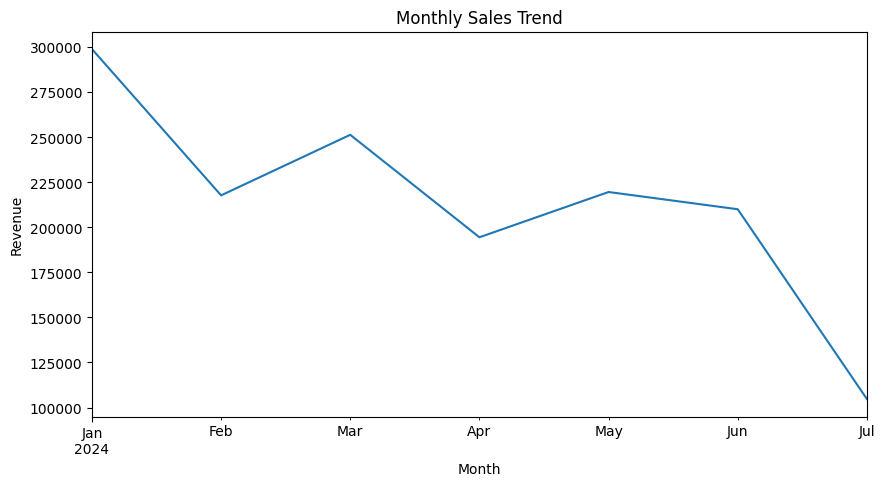

In [39]:
#Sales Trend Line Chart
monthly_sales.plot(kind='line', title='Monthly Sales Trend', figsize=(10,5))
plt.ylabel('Revenue')
plt.show()


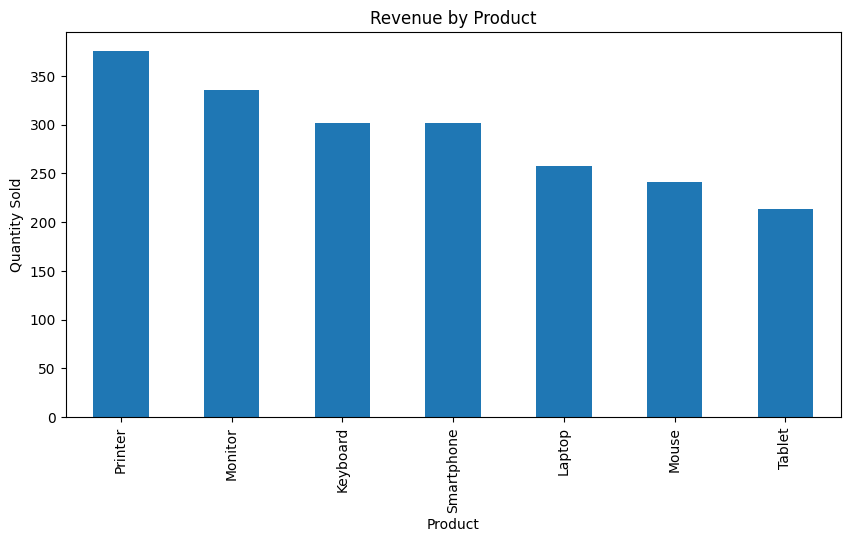

In [40]:
# Bar Chart of Revenue by Product
top_products.plot(kind='bar', title='Revenue by Product', figsize=(10,5))
plt.ylabel('Quantity Sold')
plt.show()

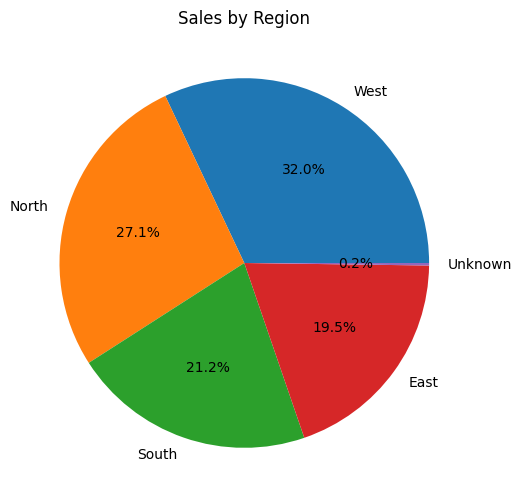

In [41]:
# Pie Chart of Sales by Region
region_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Region', figsize=(6,6))
plt.ylabel('')
plt.show()

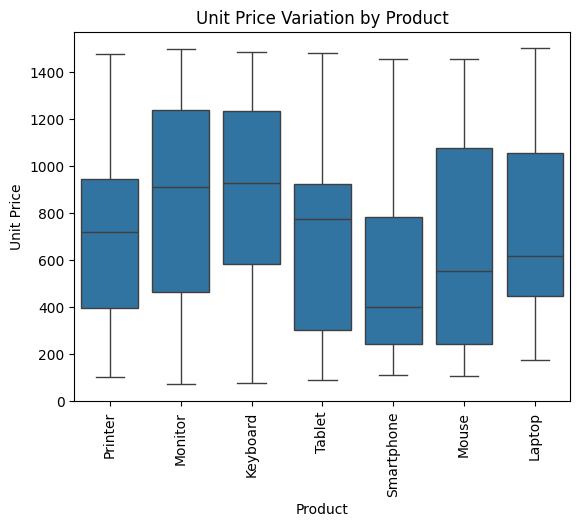

In [42]:
# Boxplot for Unit Price Variation
sns.boxplot(x='Product', y='Unit Price', data=df)
plt.xticks(rotation=90)
plt.title('Unit Price Variation by Product')
plt.show()
